<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [64]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [65]:
# Answer:
number_rows = movies.shape[0]
number_columns = movies.shape[1]
print('There are ' + str(number_rows) + ' of rows and there are ' +
     str(number_columns) + ' columns in the movies data frame.')

There are 979 of rows and there are 6 columns in the movies data frame.


#### Check the data type of each column.

In [66]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [67]:
# Answer:
average_duration = round(movies['duration'].mean(),1)
print('The average movie duration is ' + str(average_duration) + ' minutes.')

The average movie duration is 121.0 minutes.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [68]:
# Answer:
movies.sort_values('duration',ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

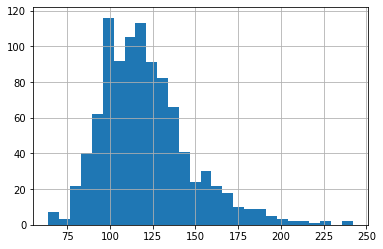

In [69]:
# Answer:
movies['duration'].hist(bins='auto')

#### Use a box plot to display that same data.

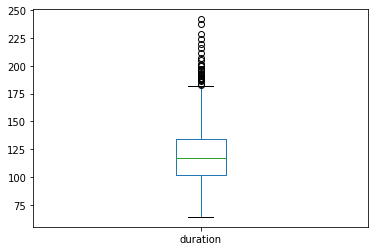

In [70]:
# Answer:
movies['duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [71]:
# Answer:
df = movies.groupby('content_rating')['title'].count().to_frame().reset_index()

#### Use a visualization to display that same data, including a title and x and y labels.

In [72]:
x = df['title'].tolist()
labels = df['content_rating'].tolist()

In [73]:
print(labels)

['APPROVED', 'G', 'GP', 'NC-17', 'NOT RATED', 'PASSED', 'PG', 'PG-13', 'R', 'TV-MA', 'UNRATED', 'X']


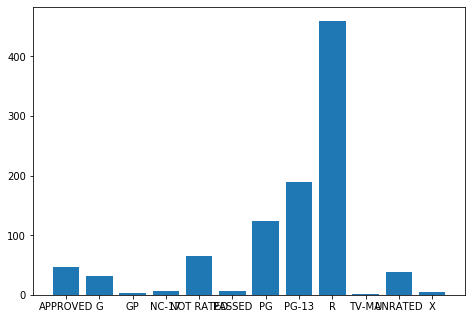

In [74]:
# Answer:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,x)
plt.show()

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [75]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED')

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [76]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['X','TV-MA'],'NC-17')

#### Count the number of missing values in each column.

In [77]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [80]:
# Answer:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [82]:
movies['content_rating'] = movies['content_rating'].replace([np.nan],'PG-13')

In [83]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [89]:
# Answer:
ave_greater_than_2 = movies[(movies['duration'] >= 120)]['star_rating'].mean()
ave_less_than_2    = movies[(movies['duration'] < 120)]['star_rating'].mean()
diff = ave_greater_than_2 - ave_less_than_2

In [91]:
print('Movies that are 2 hours or longer average ' + 
      str(round(ave_greater_than_2,2)) + ' stars. This is ' + str(round(diff,2)) + 
      ' higher than movies that are less than 2 hours in duration.')

Movies that are 2 hours or longer average 7.95 stars. This is 0.11 higher than movies that are less than 2 hours in duration.


#### Use a visualization to detect whether there is a relationship between duration and star rating.

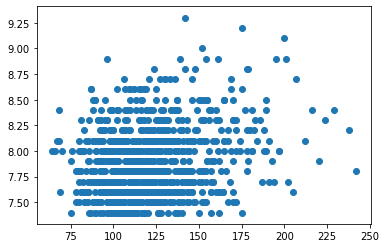

In [93]:
# Answer:
y = movies['star_rating'].tolist()
x = movies['duration'].tolist()
plt.scatter(x, y)
plt.show()

#### Calculate the average duration for each genre.

In [98]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [99]:
# Answer:
content_duration = movies.groupby('content_rating')['duration'].mean().reset_index()

In [100]:
content_duration

,content_rating,duration
0,G,112.343750
1,NC-17,116.250000
2,PG,115.300813
3,PG-13,127.270833
4,R,122.163043
5,UNRATED,116.475000


In [102]:
labels   = content_duration['content_rating'].tolist()
duration = content_duration['duration'].tolist()

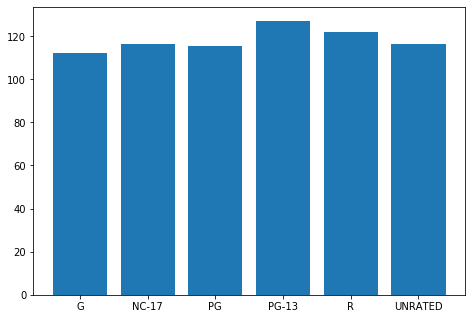

In [103]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,duration)
plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [110]:
# Answer:
movies.groupby('genre').apply(lambda x: x.iloc[:1].sort_values('star_rating',ascending=False))

,,star_rating,title,content_rating,genre,duration,actors_list
genre,,,,,,,
Action,3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [116]:
# Answer:

movies.duplicated('title').value_counts()

False    975
True       4
dtype: int64

In [119]:
dups = movies.duplicated('title',keep=False)

In [123]:
movies[dups]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [133]:
# Answer:
genre_value_counts = movies['genre'].value_counts().reset_index()

In [137]:
genreList = genre_value_counts[genre_value_counts['genre'] >= 10]['index'].tolist()

In [140]:
movies[movies['genre'].isin(genreList)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [150]:
explore = movies['actors_list'].value_counts().reset_index()

In [151]:
explore

,index,actors_list
0,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",6
1,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...",3
2,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le...",2
3,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']",2
4,"[u'Ian McKellen', u'Martin Freeman', u'Richard...",2
...,...,...
964,"[u'Suraj Sharma', u'Irrfan Khan', u'Adil Hussa...",1
965,"[u'David Hemmings', u'Vanessa Redgrave', u'Sar...",1
966,"[u'Bradley Cooper', u'Anna Friel', u'Abbie Cor...",1
967,"[u'Walter Pidgeon', u'Anne Francis', u'Leslie ...",1
